In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#Read File
df=pd.read_csv('Regression_Data_set_Batch1.csv')
print(df.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
print(df.shape) #Find Dimensions

(545, 13)


In [3]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [4]:
df.isna().sum() #Find number of na Values


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
#Count 0 in coumns
co1=df['price']
co1=co1[co1==0].count()
print(f'\nNumber of zeros in column price is :{co1}')

co2=df['area']
co2=co2[co2==0].count()
print(f'\nNumber of zeros in column area is :{co2}')

co2=df['bedrooms']
co2=co2[co2==0].count()
print(f'\nNumber of zeros in column bedrooms is :{co2}')

co2=df['bathrooms']
co2=co2[co2==0].count()
print(f'\nNumber of zeros in column bathrooms is :{co2}')

co2=df['stories']
co2=co2[co2==0].count()
print(f'\nNumber of zeros in column stories is :{co2}')

co=df['parking']
c6=co[co==0].count()
print(f'\nNumber of zeros in column parking is :{c6}')


Number of zeros in column price is :0

Number of zeros in column area is :0

Number of zeros in column bedrooms is :0

Number of zeros in column bathrooms is :0

Number of zeros in column stories is :0

Number of zeros in column parking is :299


In [6]:
#Find Corelation matrix
print(df.corr())

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


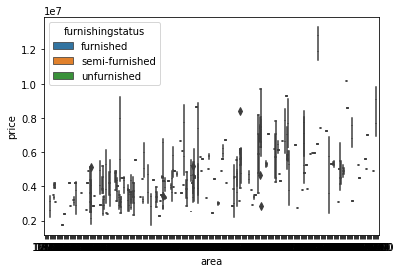

In [7]:
sns.boxplot(data=df,x='area',y='price',hue='furnishingstatus')

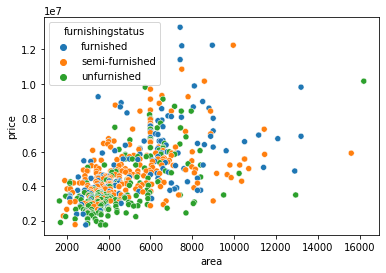

In [8]:
sns.scatterplot(data=df,x='area',y='price',hue='furnishingstatus')

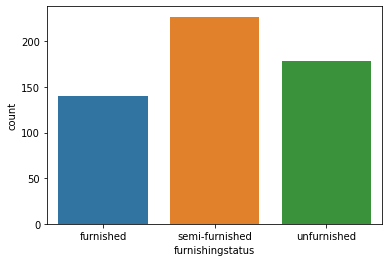

In [9]:
sns.countplot(data=df,x='furnishingstatus')

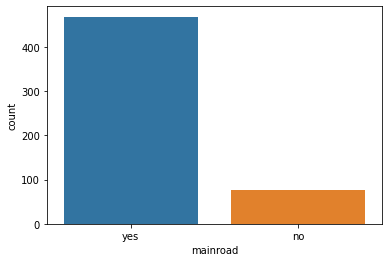

In [10]:
sns.countplot(data=df,x='mainroad')

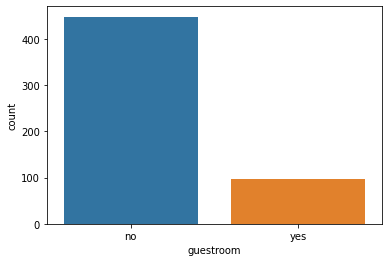

In [11]:
sns.countplot(data=df,x='guestroom')

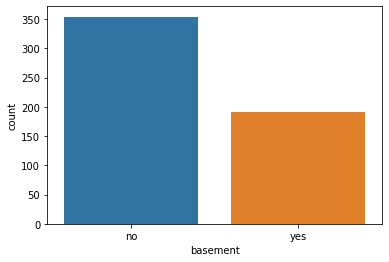

In [12]:
sns.countplot(data=df,x='basement')

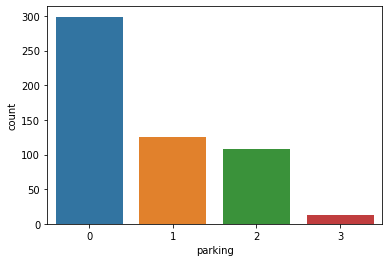

In [13]:
sns.countplot(data=df,x='parking')

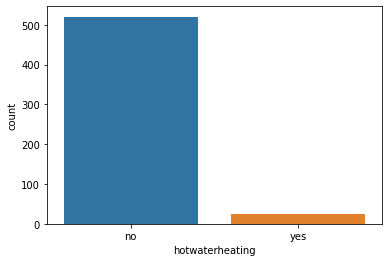

In [14]:
sns.countplot(data=df,x='hotwaterheating')

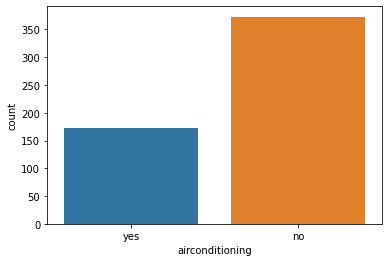

In [15]:
sns.countplot(data=df,x='airconditioning')

In [19]:
#get the column area and price and reshape
x=df['area'].values.reshape(-1,1)
y=df['price'].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(545, 1)
(545, 1)


In [20]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(408, 1)
(137, 1)
(408, 1)
(137, 1)


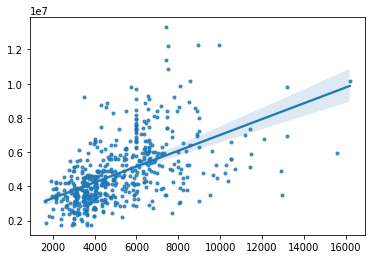

In [23]:
sns.regplot(data=df,x=x,y=y,marker='.')

In [25]:
#Build and Fit the Model
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [26]:
#Prict for Train and Test
y_pred_1=reg.predict(x_train)
y_pred_2=reg.predict(x_test)

In [27]:
#Find Metrics
print("Mean Square Error(for Train) =",mean_squared_error(y_train,y_pred_1))
print("Mean Absolute Error(for Train) =",mean_absolute_error(y_train,y_pred_1))
print("R^2 Score (for Train)=",r2_score(y_train,y_pred_1))

print("Mean Square Error(for Test) =",mean_squared_error(y_test,y_pred_2))
print("Mean Absolute Error(for Test) =",mean_absolute_error(y_test,y_pred_2))
print("R^2 Score (for Test)=",r2_score(y_test,y_pred_2))

Mean Square Error(for Train) = 2636279682368.2075
Mean Absolute Error(for Train) = 1220327.0451429565
R^2 Score (for Train)= 0.2720728427777561
Mean Square Error(for Test) = 2087288517330.2263
Mean Absolute Error(for Test) = 1057024.8163927488
R^2 Score (for Test)= 0.3237329256541952


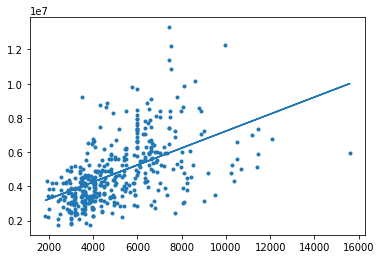

In [28]:
# Plot for Train Data
plt.scatter(x_train,y_train,marker='.')
plt.plot(x_train,y_pred_1)

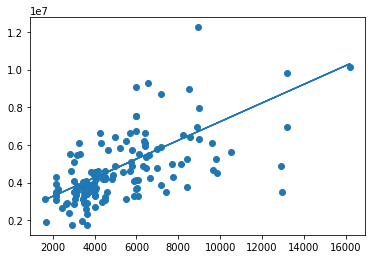

In [29]:
#Plot for Test Data
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_2)

In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df['furnishingstatus'].unique()

array([0, 1, 2])

In [33]:
df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['mainroad'].unique()

array([1, 0])

In [34]:
df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['guestroom'].unique()

array([0, 1])

In [35]:
df['basement']= label_encoder.fit_transform(df['basement'])
df['basement'].unique()

array([0, 1])

In [36]:
df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['hotwaterheating'].unique()

array([0, 1])

In [37]:
df['prefarea']= label_encoder.fit_transform(df['prefarea'])
df['prefarea'].unique()

array([1, 0])

In [38]:
df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])
df['airconditioning'].unique()

array([1, 0])

In [39]:
df.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [40]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [41]:
set1=df[['price','area','bathrooms','stories','airconditioning']]
set1.head()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(set1)
set1_scaled=model.transform(set1)
set1=pd.DataFrame(set1_scaled)
set1.head()

,0,1,2,3,4
0,1.000000,0.396564,0.333333,0.666667,1.0
1,0.909091,0.502405,1.000000,1.000000,1.0
2,0.909091,0.571134,0.333333,0.333333,0.0
3,0.906061,0.402062,0.333333,0.333333,1.0
4,0.836364,0.396564,0.000000,0.333333,1.0


In [42]:
x1=set1.iloc[:,1:]

In [43]:
y1=set1.iloc[:,0]

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=0)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(408, 4)
(137, 4)
(408,)
(137,)


In [ ]:
reg1=LinearRegression()
reg1.fit(x_train1,y_train1)

LinearRegression()

In [ ]:
y_pred1=reg1.predict(x_train1)
y_pred2=reg1.predict(x_test1)

In [ ]:
print("Mean Square Error(for Train) =",mean_squared_error(y_train1,y_pred1))
print("Mean Absolute Error(for Train) =",mean_absolute_error(y_train1,y_pred1))
print("R^2 Score (for Train)=",r2_score(y_train1,y_pred1))

print("Mean Square Error(for Test) =",mean_squared_error(y_test1,y_pred2))
print("Mean Absolute Error(for Test) =",mean_absolute_error(y_test1,y_pred2))
print("R^2 Score (for Test)=",r2_score(y_test1,y_pred2))

Mean Square Error(for Train) = 0.011952932068905863
Mean Absolute Error(for Train) = 0.08133149839929095
R^2 Score (for Train)= 0.5597140170551672
Mean Square Error(for Test) = 0.008236798508751633
Mean Absolute Error(for Test) = 0.06675476130781013
R^2 Score (for Test)= 0.6439933011209151
